In [1]:
!pip install keras-tuner

In [2]:
import tensorflow as tf 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import keras
import keras_tuner as kt
from matplotlib import image
from keras.utils import plot_model

In [3]:
print(tf.__version__)
print(tf.config.get_visible_devices())

2.17.0
[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


**image calssification input and output type**

* Shape = [batch_size, width, height, colour_channels] 
* Shape = [32, 224, 224, 3]

* Output shape = [3] --> based on number of classes trained for


* activation - > Sigmoid  - binary 
* activation -> Softmax -> multi class classification


* losses -> BinaryCrossentropy -> Binary
* losses -> CategoricalCrossentropy -> Multi Class

* metrics -> 'accuracy'

**Resource :** https://karpathy.github.io/2019/04/25/recipe/ 

In [4]:
from sklearn.datasets import make_circles

n_samples = 1000
X, y = make_circles(n_samples, 
                   noise=0.03, 
                   random_state=42)

In [5]:
type(X), X.shape, X.ndim

(numpy.ndarray, (1000, 2), 2)

In [6]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [7]:
circles = pd.DataFrame(data={
    'X0':X[:, 0],
    'X1':X[:, 1], 
    'label':y[:]
})

circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


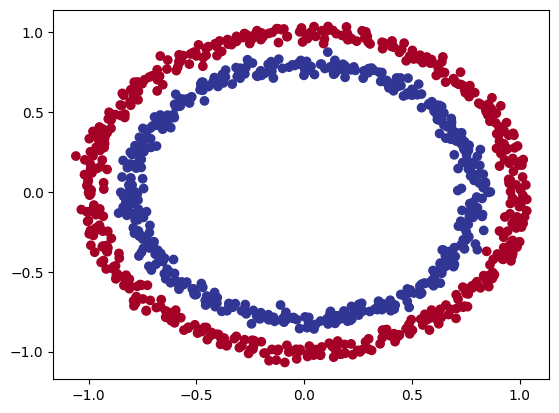

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X), len(y)

(1000, 1000)

In [11]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [12]:
# Create train, test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
def build_model():
    tf.random.set_seed(42)
    
    model = keras.Sequential(name='Model_A')
    model.add(keras.layers.Input(shape=(2,)))
    model.add(keras.layers.Dense(100, activation='relu'))
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    model.compile(loss=keras.losses.BinaryCrossentropy, 
                 optimizer=keras.optimizers.Adam(), 
                 metrics=['accuracy'])

    return model 

model = build_model()
model.summary()

Model: "Model_A"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

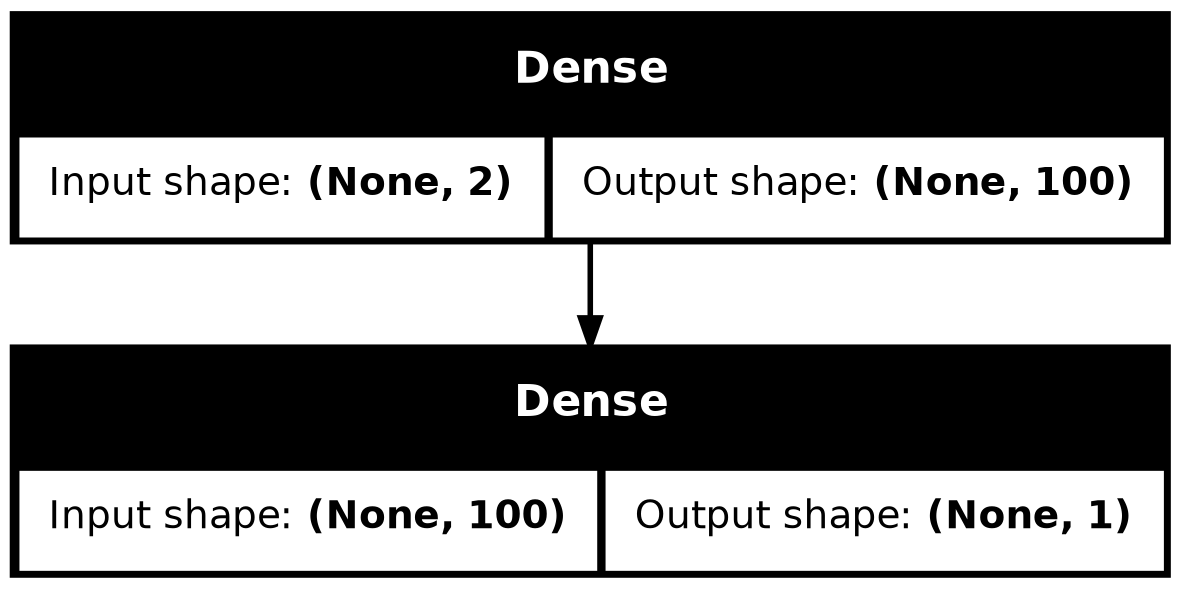

In [14]:
plot_model(model, show_shapes=True)

In [15]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', 
        patience=5, 
        restore_best_weights=True
    )
]

In [16]:
history = model.fit(X_train, y_train, callbacks=callbacks, epochs=100, verbose=0)

In [17]:
def plot_model_history(history=history):
    
    pd.DataFrame(history.history).plot() 
    plt.ylabel('Loss & Accuracy') 
    plt.xlabel('Epochs') 
    plt.legend();


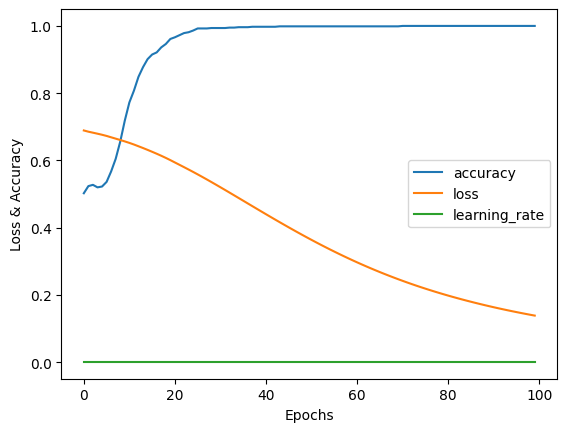

In [18]:
plot_model_history()

In [19]:
model.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.1700


[0.17846831679344177, 1.0]

In [20]:
preds = model.predict(X_test) 
# preds = (preds > 0.5).astype(int)
preds[:5]

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.9318697 ],
       [0.2174323 ],
       [0.9321758 ],
       [0.12150035],
       [0.7429359 ]], dtype=float32)

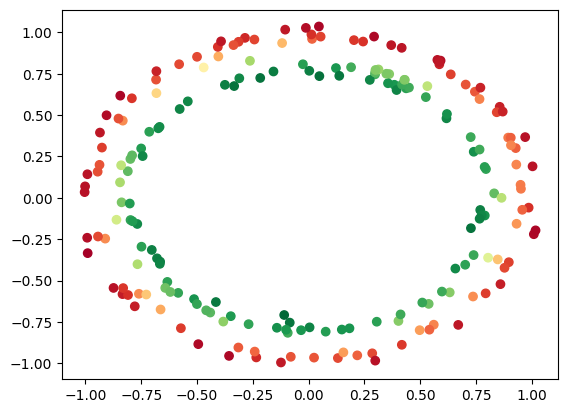

In [21]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=preds, cmap=plt.cm.RdYlGn)

## Common ways to improve a deep learning model

1. Adding layers
2. Increase the number of hidden units
3. Change the activation functions
4. Change the optimization function
5. Change the learning_rate
6. Fitting on More data
7. Fitting for longer

In [22]:
tf.keras.utils.set_random_seed(42)

model_a = keras.Sequential([
    keras.layers.Dense(100), 
    keras.layers.Dense(10), 
    keras.layers.Dense(1)
]) 

model_a.compile(loss=keras.losses.BinaryCrossentropy(), 
               optimizer=keras.optimizers.Adam(), 
               metrics=['accuracy', 'recall'])

model_a.fit(X, y, 100, verbose=0)

In [23]:
model_a.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4577 - loss: 3.6686 - recall: 0.1371


[3.615408182144165, 0.44600000977516174, 0.12200000137090683]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


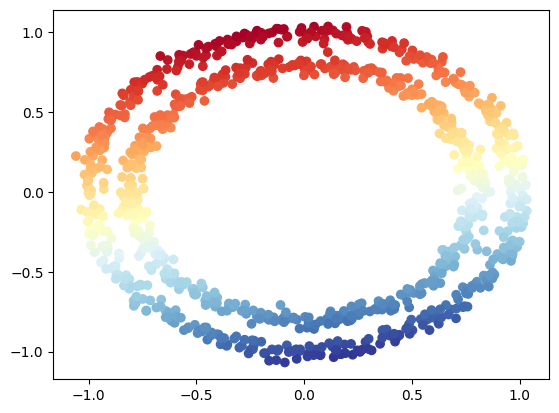

In [24]:
preds = model_a.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=preds, cmap=plt.cm.RdYlBu)

In [25]:
preds = (y_preds >= 0.5).astype(int)
preds[:2]

NameError: name 'y_preds' is not defined

In [27]:
# Create a function to plot decision boundries  

"""
1. Take a model, features(X), and labels(y)
2. Create a meshgrid of the different (X) values
3. Make predictions accross the meshgrid 
4. Plot the predictions as well as a line between prediction zones (where each unique class falls)
""" 
def plot_decision_boundries(model, X, y):
    """ 
    Plots the decision boundries created by a model predicting on X
    """

    # Define the axis boundries of the plot and create a meshgrid 

    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                        np.linspace(y_min, y_max, 100))

    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2d arrays together

    y_pred = model.predict(x_in)

    ## Check for multi class 

    if len(y_pred[0]) > 1:
        print("Doing multicalss classsification")
        # We need to reshape our preds to get them ready for plotting 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else: 
        print("Doing binarry classification")
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundries 
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max()) 
    plt.ylim(yy.min(), yy.max()) 
    
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binarry classification


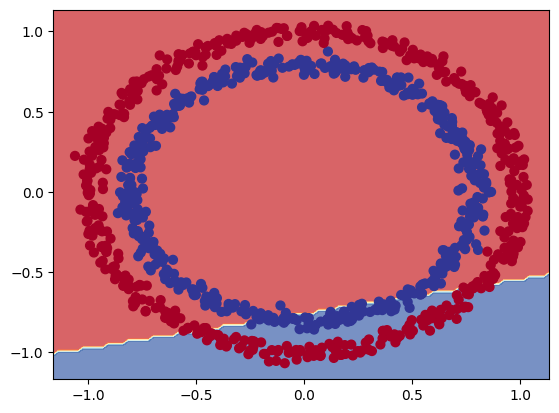

In [28]:
plot_decision_boundries(model=model_a, 
                       X=X, 
                       y=y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step
Doing binarry classification


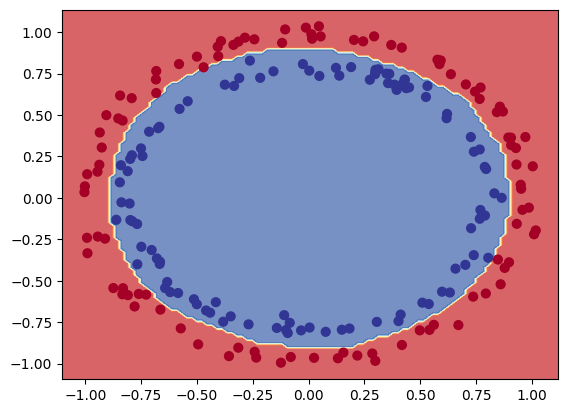

In [29]:
plot_decision_boundries(model=model, 
                       X=X_test, 
                       y=y_test)

In [ ]:
## Tranformations in plotting for clarification

In [30]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1 
x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

In [31]:
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                        np.linspace(y_min, y_max, 100))

xx, yy

(array([[-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        ...,
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175],
        [-1.15950246, -1.13633868, -1.1131749 , ...,  1.08738419,
          1.11054797,  1.13371175]]),
 array([[-1.16776832, -1.16776832, -1.16776832, ..., -1.16776832,
         -1.16776832, -1.16776832],
        [-1.14449789, -1.14449789, -1.14449789, ..., -1.14449789,
         -1.14449789, -1.14449789],
        [-1.12122747, -1.12122747, -1.12122747, ..., -1.12122747,
         -1.12122747, -1.12122747],
        ...,
        [ 1.08946283,  1.08946283,  1.08946283, ...,  

In [32]:
x_in = np.c_[xx.ravel(), yy.ravel()] 
x_in

array([[-1.15950246, -1.16776832],
       [-1.13633868, -1.16776832],
       [-1.1131749 , -1.16776832],
       ...,
       [ 1.08738419,  1.13600368],
       [ 1.11054797,  1.13600368],
       [ 1.13371175,  1.13600368]])

## Missing piece is --> Non linearity 

* Mimic tensorflow playground behavior. 

In [35]:
## Model-4 

keras.utils.set_random_seed(42)

model_4 = keras.Sequential([
    keras.layers.Dense(1, activation=keras.activations.linear)
])

model_4.compile(loss=keras.losses.BinaryCrossentropy(), 
               optimizer=keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])

history_4 = model_4.fit(X, y, epochs=100, verbose=0) 
model_4.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4963 - loss: 3.7693


[4.084546089172363, 0.47699999809265137]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step
Doing binarry classification


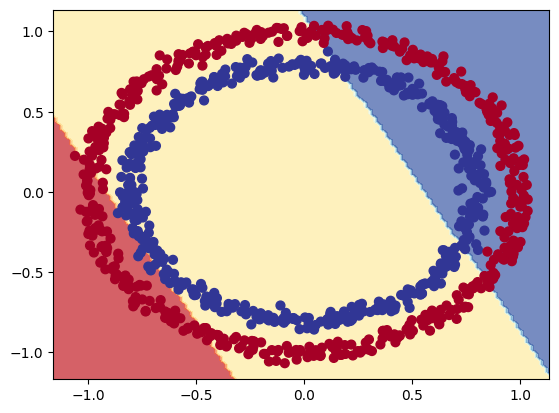

In [34]:
plot_decision_boundries(model=model_4, 
                       X=X, 
                       y=y)

<Axes: >

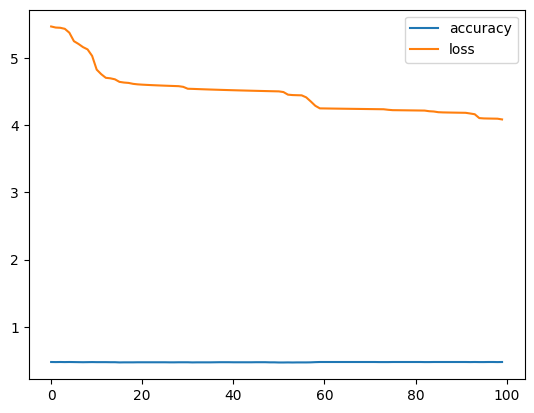

In [36]:
pd.DataFrame(history_4.history).plot()

In [37]:
# Model-5  - Non linear activation function - RElu 

keras.utils.set_random_seed(42) 
model_5 = keras.Sequential([
    keras.layers.Dense(1, activation=keras.activations.relu)
], name="Model_5")

model_5.compile(loss=keras.losses.BinaryCrossentropy(), 
               optimizer=keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])

model_5.fit(X, y, epochs=100, verbose=0)

In [38]:
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4963 - loss: 3.7693


[4.084546089172363, 0.47699999809265137]

In [45]:
# Model-5  - Non linear activation function - RElu 

keras.utils.set_random_seed(42) 
model_6 = keras.Sequential([
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation=keras.activations.sigmoid)
], name="Model_6")

model_6.compile(loss=keras.losses.BinaryCrossentropy(), 
               optimizer=keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy'])

model_6.fit(X, y, epochs=100, verbose=0)

In [46]:
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.1198


[0.11726119369268417, 1.0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binarry classification


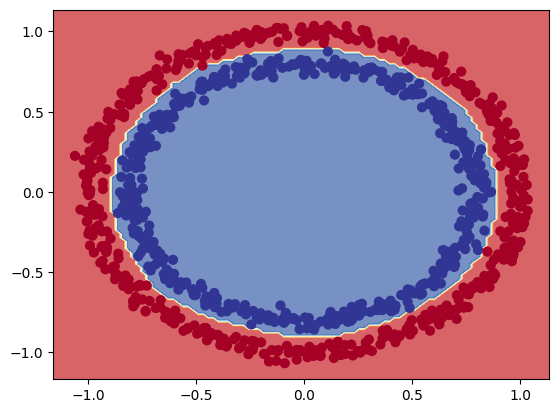

In [47]:
plot_decision_boundries(model=model_6, 
                       X=X, 
                       y=y)

In [51]:
# model-7 - 2 hidden layers with multiple neurons 

keras.utils.set_random_seed(42)

model_7 = keras.Sequential(name="Model_7")
model_7.add(keras.layers.Dense(100, activation='relu'))
model_7.add(keras.layers.Dense(100, activation='relu'))
model_7.add(keras.layers.Dense(1, activation='sigmoid'))

model_7.compile(loss=keras.losses.BinaryCrossentropy(), 
               optimizer=keras.optimizers.Adam(learning_rate=0.001), 
               metrics=['accuracy', 'precision', 'recall', 'auc'])

model_7.fit(X, y, epochs=100, verbose=0)

In [55]:
model_7.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - auc: 1.0000 - loss: 0.0067 - precision: 1.0000 - recall: 1.0000 


[0.00919947400689125, 1.0, 1.0, 1.0, 1.0000001192092896]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step
Doing binarry classification


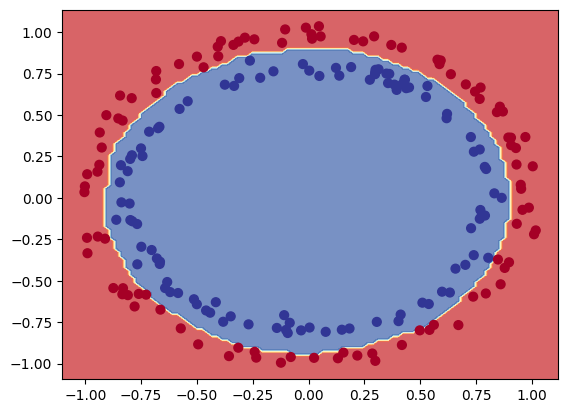

In [54]:
plot_decision_boundries(model=model_7, 
                       X=X_test, 
                       y=y_test)

# Replication non linear model 

In [57]:
A = tf.cast(tf.range(-10, 10), dtype=tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

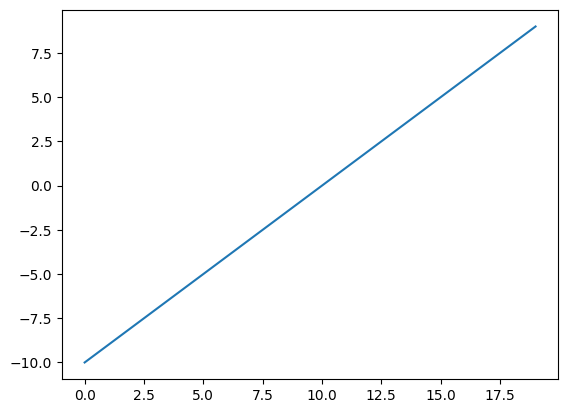

In [58]:
plt.plot(A)

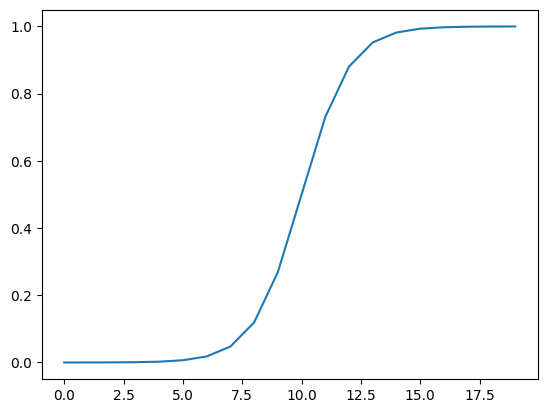

In [60]:
## Start by replication sigmoid 

def sigmoid(x):
    return 1/ (1 + tf.exp(-x)) 

plt.plot(sigmoid(A));

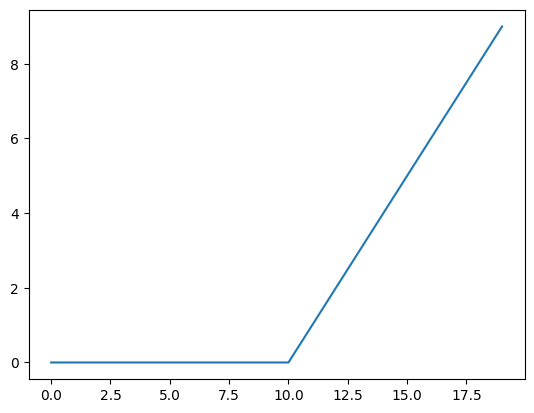

In [68]:
def relu(x):
    return tf.maximum(0, x)


plt.plot(relu(A))

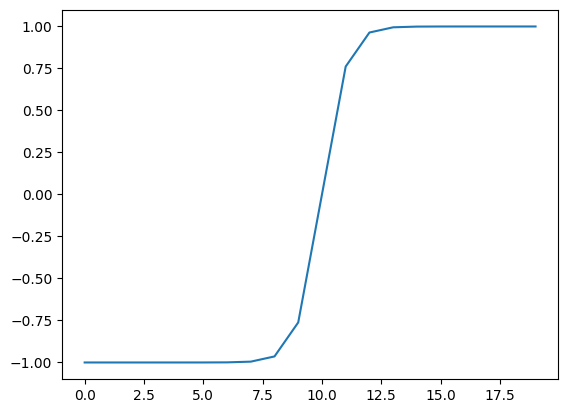

In [69]:
# tanh 

def tanh(x): 
    return tf.math.tanh(x)

plt.plot(tanh(A))

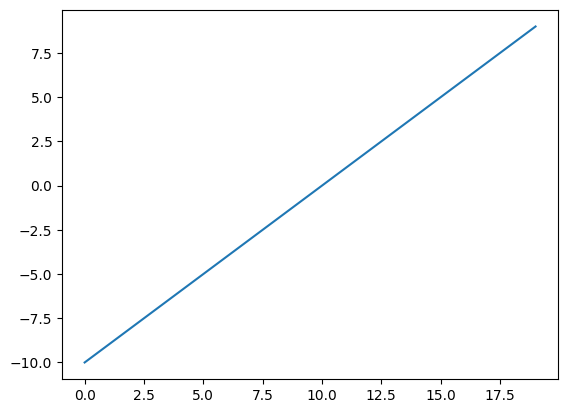

In [70]:
plt.plot(keras.activations.linear(A));

In [71]:
A == keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

In [ ]:
## Evaluating and improving classification model 
# we should not train and evaluate on same data set 

In [135]:
callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='accuracy',
        patience=9,
        restore_best_weights=True,
    ), 
    keras.callbacks.ReduceLROnPlateau(
        monitor='accuracy',
        patience=9,
        restore_best_weights=True
    )
]

In [136]:
keras.utils.set_random_seed(42)

model_8 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(4, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
]) 

model_8.compile(loss=keras.losses.BinaryCrossentropy(), 
               optimizer=keras.optimizers.Adam(learning_rate=0.005), 
               metrics=['accuracy'])

history = model_8.fit(X_train, 
            y_train, 
            epochs=150, 
            callbacks=callbacks,
            # validation_data=(X_test, y_test),
            verbose=1
           )

Epoch 1/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5067 - loss: 0.7070 - learning_rate: 0.0050
Epoch 2/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4808 - loss: 0.6945 - learning_rate: 0.0050
Epoch 3/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5025 - loss: 0.6923 - learning_rate: 0.0050
Epoch 4/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5102 - loss: 0.6903 - learning_rate: 0.0050
Epoch 5/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5037 - loss: 0.6881 - learning_rate: 0.0050
Epoch 6/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5197 - loss: 0.6854 - learning_rate: 0.0050
Epoch 7/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5287 - loss: 0.6824 - learning_rate: 0.0050
Epoch 8/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5460 - loss: 0.6787 - learning_rate: 0.0050
Epoch 9/150
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5556 - loss: 0.6739 - learning_rate: 0.0050
Epoch 10/150
25/25 

<Axes: >

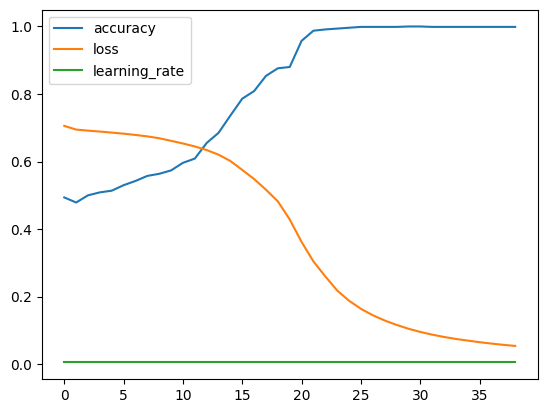

In [137]:
pd.DataFrame(history.history).plot()

In [111]:
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9828 - loss: 0.1335 - precision: 0.9774 - recall: 0.9874


[0.1382608860731125,
 0.9850000143051147,
 0.9800000190734863,
 0.9898989796638489]

In [127]:
pd.DataFrame(history.history)

,accuracy,loss,learning_rate
0,0.49375,0.705645,0.005
1,0.47875,0.694705,0.005
2,0.50000,0.691567,0.005
3,0.50875,0.688796,0.005
4,0.51375,0.685790,0.005
5,0.53000,0.682535,0.005
6,0.54250,0.678748,0.005
7,0.55750,0.674541,0.005
8,0.56375,0.669043,0.005
9,0.57375,0.661392,0.005


## Finding the best learning rate 

To find the ideal learning rate (the learning rate where the loss decreases the most during the training) we are going to use the following steps. 

1. callback
2. another model
3. modified loss curve plots

In [138]:
keras.utils.set_random_seed(42)

model_9 = keras.Sequential([
    keras.layers.Dense(4, activation='relu'), 
    keras.layers.Dense(4, activation='relu'), 
    keras.layers.Dense(1, activation='sigmoid')
])

model_9.compile(loss='binary_crossentropy', 
               optimizer='Adam', 
               metrics=['accuracy']) 

# Create a learning rate callback 

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train, 
                       y_train,
                       epochs=100, 
                       callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5087 - loss: 0.7140 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5089 - loss: 0.7132 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5095 - loss: 0.7124 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5099 - loss: 0.7115 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5079 - loss: 0.7105 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5088 - loss: 0.7095 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5009 - loss: 0.7084 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5142 - loss: 0.7073 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5129 - loss: 0.7062 - learning_

<Axes: xlabel='epochs'>

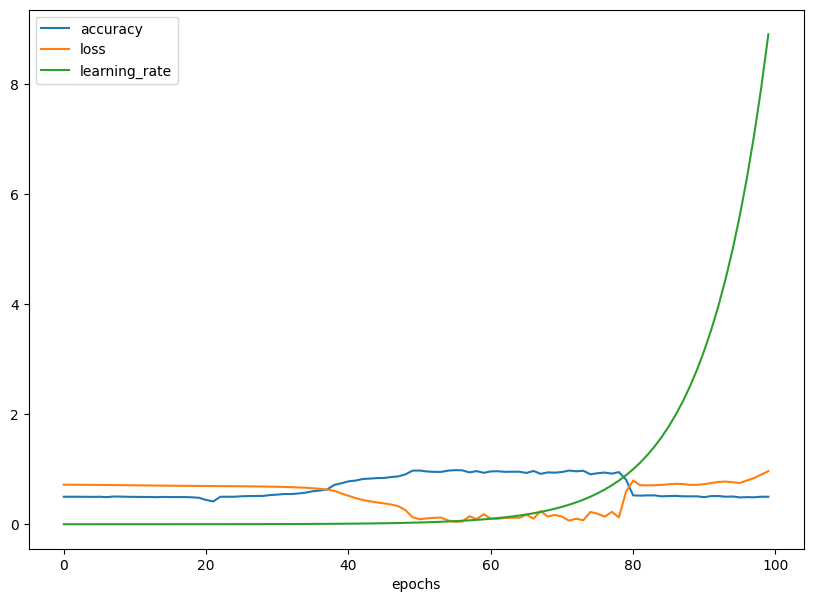

In [139]:
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs") 